### Lithography notebook

In [1]:
import numpy as np
from matplotlib.path import Path
import matplotlib.pyplot as plt


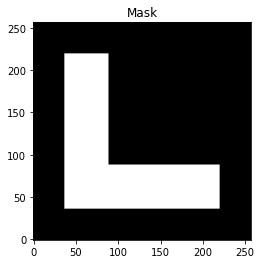

In [3]:
# Reading mask shape from file
L = 0.09
Accuracy = 8           # Degree of accuracy (integer, higher means more time more accurate)
N = 2**Accuracy + 1    # Resolution
File = 'example1.txt'   ############ CHANGE MASK HERE
Y = np.loadtxt(File)

X = Y[:,0]
Y = Y[:,1]
num_points = len(X)-1
sides = np.zeros(num_points)
for i in range(num_points):
    sides[i] = np.sqrt((X[i]-X[i+1])**2 + (Y[i]-Y[i+1])**2)
scale = L/np.min(sides)
sides = sides*scale
X = scale*X
Y = scale*Y
X = X-np.min(X)
Y = Y-np.min(Y)
Lx = 1.4*np.max(X)    # Mask real dimensions (um)
Ly = 1.4*np.max(Y)    # Mask real dimensions (um)

# Center the polygon
x = np.linspace(-0.2*np.max(X),1.2*np.max(X),N)
y = np.linspace(-0.2*np.max(Y),1.2*np.max(Y),N)

# Create mask matrix
x,y = np.meshgrid(x,y)
x = np.reshape(x,-1)
y = np.reshape(y,-1)
mask = Path(np.column_stack((X,Y)))
mask = mask.contains_points(np.column_stack((x,y)))
mask = np.reshape(mask,(N,N))
mask = mask.astype(float)

# Plot mask and aerial images

plt.title('Mask')
plt.imshow(mask, cmap='gray', origin='lower')



## Dose of exposition

In order to do the development correctly, the dose of the exposition needs to be chosen with care.



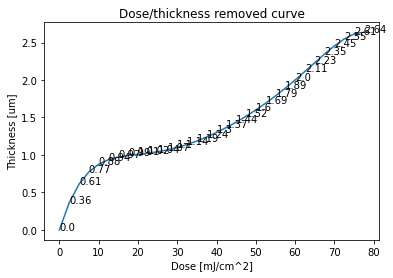

In [263]:
from scipy import interpolate
import math

dose = np.arange(0, 80, 2.5, float)
thickness= -3.08555*10**-10*dose**6 + 7.88354*10**-8*dose**5-8.17055*10**-6*dose**4+0.000437742*dose**3-0.012214*dose**2+0.173364*dose+0
for i,j in zip(dose, thickness):
    plt.text(i, j, round(float(j),2))
    
plt.title('Dose/thickness removed curve')
plt.plot(dose, thickness)
plt.ylabel('Thickness [um]')
plt.xlabel('Dose [mJ/cm^2]')
plt.show()


In [272]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import display, HTML
import pandas as pd

new_thickness = np.append(0,thickness)

init_Si_thickness = 2
SiO2_thickness = 0.5*init_Si_thickness
y_lim = 10
opening = 0.3

fig, ax = plt.subplots(figsize=(12, 6))
# Set up the plot elements

silicon = plt.Rectangle((0, 0), 1, init_Si_thickness, color='darkblue', label='Silicon')
silicon_oxide = plt.Rectangle((0, init_Si_thickness), 1, SiO2_thickness, color='darkorange', label='Silicon oxide')
resist = plt.Rectangle((0, init_Si_thickness+SiO2_thickness), 1, init_Si_thickness, color='red', label='Resist')
resist_downward_1 = plt.Rectangle((0.1, silicon.get_height()+silicon_oxide.get_height()+resist.get_height()), opening, 0.0, color='white', label='Resist development')
resist_downward_2 = plt.Rectangle((0.6, silicon.get_height()+silicon_oxide.get_height()+resist.get_height()), opening, 0.0, color='white', label='Resist development')

ax.add_patch(silicon)
ax.add_patch(silicon_oxide)
ax.add_patch(resist)
ax.add_patch(resist_downward_1)
ax.add_patch(resist_downward_2)

# Set up the axes and labels
ax.set_xlim(0, 1)
ax.set_ylim(0, y_lim)
ax.legend()

# Add title to the plot
title = ax.set_title('Deal-Grove Model')
title.set_position([.5, 1.1]) # Adjust position of the title
title.set_fontsize(10) # Adjust font size of the title
def update(frame):
    dev_thickness = new_thickness[frame]
    if(dev_thickness > resist.get_height()):
        print('All the resist has been consumed with a dose of ' + str(dose[frame]) + 'mJ/cm^2')
        dev_thickness = resist.get_height()
    resist_downward_1.set_height(dev_thickness)
    resist_downward_1.set_y(silicon.get_height()+silicon_oxide.get_height()+resist.get_height() - dev_thickness)
    resist_downward_2.set_height(dev_thickness)
    resist_downward_2.set_y(silicon.get_height()+silicon_oxide.get_height()+resist.get_height() - dev_thickness)
    ax.set_ylim(0,y_lim)
    ax.set_yticks([0, silicon.get_height()+silicon_oxide.get_height()+resist.get_height(),silicon.get_height()+silicon_oxide.get_height()+resist.get_height()-dev_thickness])
    ax.set_ylim(0,y_lim)
    ax.set_yticklabels([0, 0,f"{dev_thickness:.2f} µm (dev)"])

    
ani = FuncAnimation(fig, update, frames=len(thickness), interval=100, repeat=False)

plt.close()
# Display the animation in JupyterLab
html_code = ani.to_jshtml()
centered_html = f'<div style="display: flex; justify-content: center;">{html_code}</div>'
display(HTML(centered_html))

All the resist has been consumed with a dose of 65.0mJ/cm^2
All the resist has been consumed with a dose of 67.5mJ/cm^2
All the resist has been consumed with a dose of 70.0mJ/cm^2
All the resist has been consumed with a dose of 72.5mJ/cm^2
All the resist has been consumed with a dose of 75.0mJ/cm^2
All the resist has been consumed with a dose of 77.5mJ/cm^2


### Block I
<div class="alert-info">

Introduction about why lithography is useful here in our case. Present the final design that we want to obtain after the development, so that the student can have an idea of the mask.
</div>


<div class="alert-danger">

The first exercise consists of the choice of the mask ; depending on the selected resist (negative/positive), different masks can be used to reach the final pattern. Different masks are presented here and the student should select the correct one ; each mask will generate a cross-section of the wafer after the development. 
</div>


<div class="alert-success">
By generating the cross-section of the wafter after the exposition, the student should be able to understand why the choice is not correct. No additional information should be required.
</div>

### Block II
<div class="alert-info">

Introduction of an interactive exercicse. Here the idea is to quickly reconstruct the contrast curve ; this is an important point in the cleanrooms practicals and it's not always understood by the student.

<div class="alert-danger">
Knowing that the intensity used during the practicals is 20 [$mW/cm^2$], the following formula allows to calculate different doses, by chosing different exposure times. By giving information about the value of $D_{100}$, the student should be able to choose different exposure times to generate the contrast curve.
\begin{equation}
D = log(I\cdot t_{exp})
\end{equation}


The main plot function will be implemented, the student will have to select the different times and doses.
</div>

<div class="alert-success">
In theory, all the resist should be removed at the time that corresponds to $D_{100}$. However, in practice it's different ; all the resist can be removed before or after $D_{100}$ --> discuss the different phenomena ?
</div>

### Block III
<div class="alert-info">
This block could be composed of a 3D simulation as shown by Hernan, to show more intuitively the different results obtained when some parameters are modified. This can be a good support for the next exercise.
</div>

<div class="alert-danger">
Now the goal is to see if the student understood the simulation presented in the previous cell. Here the idea is to show different miscroscope images at different exposure time. The student should be able to select the correct image with the correct dose or/and exposure times, etc. One additional question about the interferences can be asked.